In [1]:
!pip install kaggle

In [2]:
# configuring the file of path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# daatset api
!kaggle competitions download -c cifar-10

100% 713M/715M [00:24<00:00, 35.2MB/s]
100% 715M/715M [00:24<00:00, 30.4MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the dataseet is extracted")

the dataseet is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.6 MB/s eta 0:00:00


In [8]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


# Importing the dependisies

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split


In [11]:
filename= os.listdir('/content/train')

In [12]:
type(filename)

list

In [13]:
len(filename)

50000

In [14]:
print(filename[:5])
print(filename[-5:])

['26437.png', '41574.png', '31668.png', '13045.png', '16017.png']
['33209.png', '23567.png', '23745.png', '361.png', '40552.png']


# Labels processing

In [15]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [16]:
labels_df.shape

(50000, 2)

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [19]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [20]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [21]:
labels_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5, 'frog':6, 'horse':7, 'ship':8,'truck':9 }

labels = [labels_dictionary[i] for i in labels_df['label']]

In [22]:
print(labels[:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


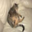

In [23]:
#displaying sample images
import cv2
from google.colab.patches import cv2_imshow


img=cv2.imread('/content/train/13202.png')
cv2_imshow(img)

In [24]:
labels_df[labels_df['id']== 13202]

,id,label
13201,13202,cat


In [25]:
id_list = list(labels_df['id'])
print(id_list[:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


#Image processing

In [26]:
# convert images to numpt arrays
train_data_folder = '/content/train/'
data=[]

for id in id_list:
  # reading the image in particular format
  image=Image.open(train_data_folder + str(id) + '.png')
  # changing the image to np array
  image=np.array(image)
  data.append(image)

In [27]:
type(data[0])

numpy.ndarray

In [28]:
len(data)

50000

In [29]:
data[0].shape

(32, 32, 3)

In [30]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [31]:
# convert images list and labels list to numpy array
X=np.array(data)
Y=np.array(labels)

In [32]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


# Train test spliting

In [33]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [34]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000,), (10000,))

In [35]:
#Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [36]:
X_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

#Building the neural network

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 10

# setting up the layers of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

# Compile the netwrok

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

# Training the neural network

In [40]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 12s 4ms/step - loss: 1.9765 - acc: 0.2859 - val_loss: 1.8711 - val_acc: 0.3230
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8484 - acc: 0.3372 - val_loss: 1.7955 - val_acc: 0.3562
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8143 - acc: 0.3551 - val_loss: 1.7962 - val_acc: 0.3545
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7926 - acc: 0.3600 - val_loss: 1.7683 - val_acc: 0.3600
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7760 - acc: 0.3692 - val_loss: 1.7751 - val_acc: 0.3575
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7637 - acc: 0.3706 - val_loss: 1.7464 - val_acc: 0.3677
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7547 - acc: 0.3777 - val_loss: 1.7611 - val_acc: 0.3665
Epoch 8/10
1125/1125 [==============================] - 4s 4m

# Resnet 50 and transfer learning

In [41]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [42]:
convolutional_base= ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [43]:
num_of_classes=10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))


In [44]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']

              )

In [45]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 466s 379ms/step - loss: 2.0589 - acc: 0.2578 - val_loss: 1.6308 - val_acc: 0.3945
Epoch 2/10
1125/1125 [==============================] - 434s 386ms/step - loss: 1.4544 - acc: 0.4713 - val_loss: 1.4551 - val_acc: 0.4897
Epoch 3/10
1125/1125 [==============================] - 427s 380ms/step - loss: 1.2303 - acc: 0.5706 - val_loss: 1.1541 - val_acc: 0.5875
Epoch 4/10
1125/1125 [==============================] - 428s 380ms/step - loss: 1.0892 - acc: 0.6286 - val_loss: 1.2972 - val_acc: 0.5645
Epoch 5/10
1125/1125 [==============================] - 435s 386ms/step - loss: 0.9967 - acc: 0.6623 - val_loss: 0.8987 - val_acc: 0.6845
Epoch 6/10
1125/1125 [==============================] - 435s 387ms/step - loss: 0.8978 - acc: 0.6958 - val_loss: 0.8360 - val_acc: 0.7150
Epoch 7/10
1125/1125 [==============================] - 428s 381ms/step - loss: 0.8336 - acc: 0.7212 - val_loss: 0.7823 - val_acc: 0.7293
Epoch 8/10
1125/1125 [============

In [47]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 38s 116ms/step - loss: 0.7771 - acc: 0.7513
Test Accuracy = 0.7512999773025513


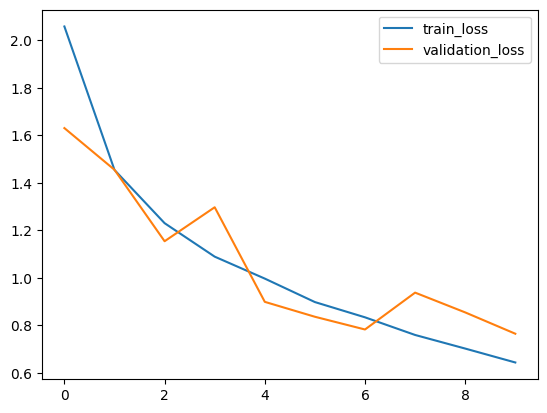

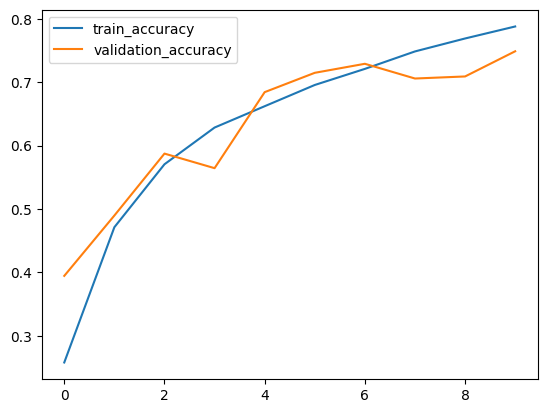

In [46]:
h=history


# plot the loss func
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()


# plot the acc func
plt.plot(h.history['acc'], label='train_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

# Making prediction on custom image

In [120]:
# import cv2
# from google.colab.patches import cv2_imshow

# img_path="/content/dogbreed1"
# img=cv2.imread('/content/dogbreed1')
# cv2_imshow(img)

In [121]:
# img = image.load_img(img_path, target_size=(224, 224))